Matplotlib is building the font cache; this may take a moment.
/tmp/xpython_42/297359827.py:3: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.0)
  from scipy.optimize import curve_fit


Valor de la distancia focal estimada:  9.362398546510608
Valor del radio:  18.724797093021216
Valor del distancia focal real:  10
Error porcentual: 6.38%


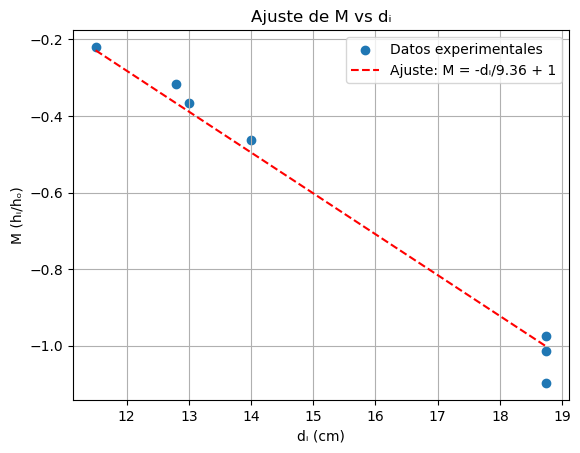

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos extraídos manualmente de la tabla
di = np.array([14, 13, 12.8, 18.75, 18.75, 18.75, 11.5])  # di
M = np.array([-0.463, -0.365, -0.317, -0.976, -1.0146, -1.0976, -0.2195])  # M = hi/ho

# Definimos el modelo: M = -di/f + 1
def model(di, f):
    return -di / f + 1

# Ajustar el modelo a los datos
params, _ = curve_fit(model, di, M)
f_estimada = params[0]

# Generar curva ajustada
di_fit = np.linspace(min(di), max(di), 100)
M_fit = model(di_fit, f_estimada)

# Graficar
plt.scatter(di, M, label="Datos experimentales")
plt.plot(di_fit, M_fit, 'r--', label=f"Ajuste: M = -dᵢ/{f_estimada:.2f} + 1")
plt.xlabel("dᵢ (cm)")
plt.ylabel("M (hᵢ/hₒ)")
plt.title("Ajuste de M vs dᵢ")
plt.legend()
plt.grid(True)

# Valor de f y de R
print("Valor de la distancia focal estimada: ", f_estimada)
print("Valor del radio: ", f_estimada * 2)

# Diferencia porcentual
def error_porcentual(valor_experimental, valor_teorico):
    return abs((valor_experimental - valor_teorico) / valor_teorico) * 100
f_real = 10
print("Valor del distancia focal real: ", f_real)
error = error_porcentual(f_estimada, f_real)
print(f"Error porcentual: {error:.2f}%")